# Ford GoBikes Analysis
## by Youngsik Son

## Investigation Overview

> Ford GoBikes is a regional public bike-sharing system covering the greater San Francisco Bay area. In this investigation, I've focused on finding the bike usage trend and the charateristics of the different user types in the Ford GoBike share system. 

## Dataset Overview

> The dataset includes the information about individual rides made in a Ford GoBikes service in the greater San Francisco Bay area in Feburary 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ford_gobike_master.csv')

## User Types

> There are two types of users who use the Ford GoBike: Customer and Subscriber.
<br/>
In Feburary 2019, 89.2% of the bike trips were used by Subscribers, and 10.8% of the bike trips were used by casual Customers. 



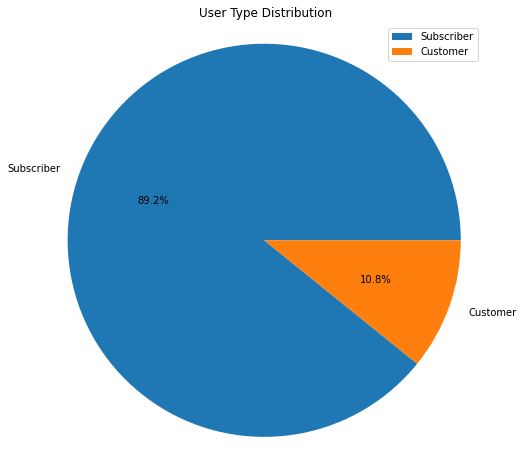

In [3]:
# Counts of the User Types
type_counts = df.user_type.value_counts()

plt.figure(figsize=[ 11, 8]);
plt.pie(type_counts, labels = type_counts.index, autopct='%1.1f%%')
plt.legend()
plt.title("User Type Distribution")
plt.axis('square');

## Weekly Usage by User Type

> The number of usage for the Ford GoBike for Customers are consistently low staying under 5,000 trips during the whole week. On the other hand, Subscribers actively used the Ford GoBikes service from Monday to Friday over 23,000 trips and there is a significant drop on the weekends (Saturday and Sunday).


Text(0, 0.5, 'Count')

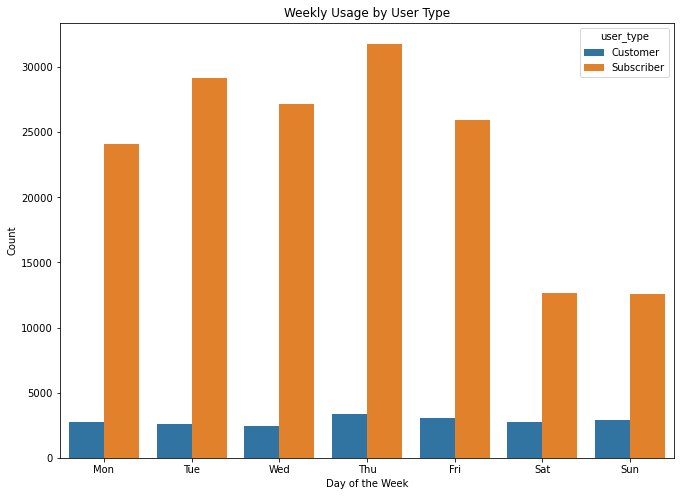

In [4]:
# Compare the number of usages over the week by Customer and Subscriber
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=[ 11, 8]);

sb.countplot(data = df, x = 'start_time_day', order=weekday, hue = 'user_type')
plt.title("Weekly Usage by User Type")
plt.xlabel("Day of the Week")
plt.ylabel("Count")

## Weekly Average Trip Duration by User Type

> Customers had longer average trip durations than the Subscribers both on the weekdays and the weekends. There was an increase of trip durations on the weekends for both user types, but it increased more significantly for Customers than the Subscribers.

Text(0, 0.5, 'Duration Time in Minute')

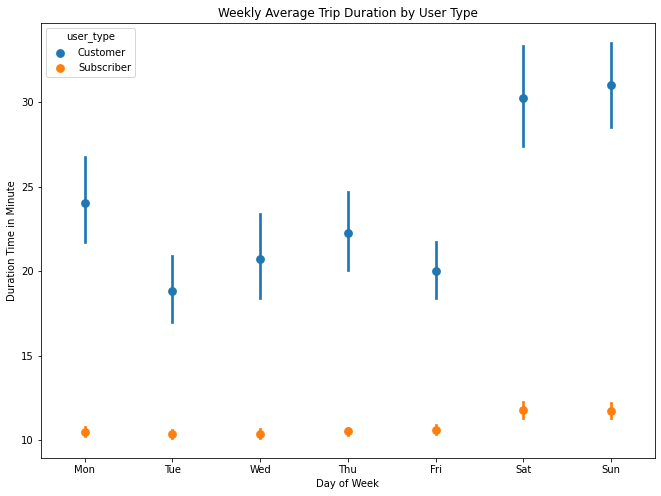

In [5]:
# Compare the average trip duration time over the week by Customer and Subscriber
plt.figure(figsize=[ 11, 8]);

sb.pointplot(data=df, x='start_time_day', y='duration_min', hue='user_type', order=weekday, linestyles="");
plt.title("Weekly Average Trip Duration by User Type")
plt.xlabel('Day of Week');
plt.ylabel('Duration Time in Minute')

## Weekly Trends of Start Time by User type

> The Ford GoBike System service was popular between the hours of 8-9 am and 5-6 pm from Monday to Friday for both Customers and Subscribers. On the weekends though, Customers trips are concentrated in the middle of the day around 11 to 4 pm while Subscribers are not active at all.

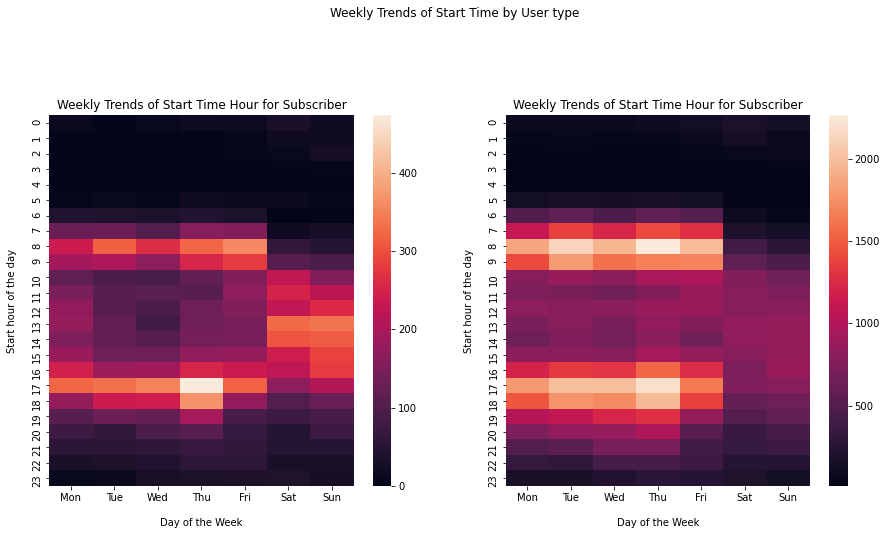

In [10]:
#Create the list in the order for the weekdays
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

#Using Categorical() function to set the order as the above
df['start_time_day'] = pd.Categorical(df['start_time_day'], categories=days, ordered=True)

plt.figure(figsize=[15, 15]);
plt.suptitle('Weekly Trends of Start Time by User type')

#Ford GoBikes Customer 
plt.subplot(2, 2, 1)
df_customer = df.query('user_type=="Customer"')
customer_pivot = pd.pivot_table(df_customer, index="start_time_hour", columns="start_time_day", values="bike_id",aggfunc=lambda x: x.value_counts().count(), fill_value=0)
sb.heatmap(customer_pivot)
plt.title("Weekly Trends of Start Time Hour for Subscriber")
plt.xlabel('Day of the Week', labelpad = 15)
plt.ylabel('Start hour of the day', labelpad = 15);

#Ford GoBikes Subscriber 
plt.subplot(2, 2, 2)
df_subscriber = df.query('user_type=="Subscriber"')
subscriber_pivot = pd.pivot_table(df_subscriber, index="start_time_hour", columns="start_time_day", values="bike_id",aggfunc=lambda x: x.value_counts().count(), fill_value=0)
sb.heatmap(subscriber_pivot)
plt.title("Weekly Trends of Start Time Hour for Subscriber")
plt.xlabel('Day of the Week', labelpad = 15)
plt.ylabel('Start hour of the day', labelpad = 15);
plt.show()



## Summary

- In Feburary 2019, 89.2% of user types in Ford GoBikes service were Subscribers, and 10.8% of user types were Customers.
<br/>
- Subscribers are primarily daily commuters who use the Ford GoBikes on regular basis on weekdays around 8-9 am and 5-6 pm.
<br/>
- Customers are casually using the Ford GoBikes throughout the week but with longer duration time on the weekends. On the weekdays, Customers mainly use GoBikes in commuting hours but on the weekends their trips are concentrated 11-4 pm.


In [13]:
#!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle